# Final Project Template 

## 1) Get your data
You may use any data set(s) you like, so long as they meet these criteria:

* Your data must be publically available for free.
* Your data should be interesting to _you_. You want your final project to be something you're proud of.
* Your data should be "big enough":
    - It should have at least 1,000 rows.
    - It should have enough of columns to be interesting.
    - If you have questions, contact a member of the instructional team.

## 2) Provide a link to your data
Your data is required to be free and open to anyone.
As such, you should have a URL which anyone can use to download your data:

Description of Data acquisition can be found in /final-project/DataHandling.ipynb 
Briefly, NCBI complete genomes were downloaded from RefSeq and split into their constituent plasmids and chromsomes. Large sequences were split using Emboss splitter and a data frame containing Accessions, Sequence Type, Range, and Sequence were exported to a CSV. This CSV was imported into R to generate a kmer (n=5) frequency table in R using Bioconductor:Biostrings:oligonucleotideFrequency. 

Output from this process is in Data/kmer5-5000bp.csv


## 3) Import your data
In the space below, import your data.
If your data span multiple files, read them all in.
If applicable, merge or append them as needed.

In [304]:
import pandas as pd
import numpy as np
df = pd.read_csv("Split500kb-kmers.csv",index_col=0)

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("500kb-9mers.csv",index_col=0)

## 4) Show me the head of your data.

In [5]:
df.head()

,Acc,Type,AAAAA,AAAAC,AAAAG,AAAAT,AAACA,AAACC,AAACG,AAACT,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
1,AP_022661.1,plasmid,0.005667,0.001980,0.004301,0.004392,0.002071,0.000956,0.000637,0.001684,...,0.000751,0.005121,0.002799,0.002412,0.001593,0.003823,0.005029,0.004984,0.004301,0.009194
2,AP_022662.1,plasmid,0.007103,0.004653,0.003306,0.004164,0.003796,0.002082,0.001347,0.001592,...,0.001225,0.002449,0.002694,0.001714,0.001225,0.002694,0.002449,0.003919,0.002572,0.003429
3,AP_022663.1,plasmid,0.005566,0.002551,0.002087,0.003711,0.002319,0.000928,0.001391,0.000928,...,0.001855,0.003247,0.002087,0.002551,0.001391,0.002783,0.002319,0.004406,0.002783,0.006957
4,AP_022664.1,plasmid,0.003239,0.002159,0.001080,0.003598,0.001439,0.001799,0.002879,0.001080,...,0.002519,0.004678,0.002879,0.002879,0.003239,0.004678,0.001439,0.006837,0.004678,0.008276
5,CP_050955.1,plasmid,0.008267,0.004313,0.004313,0.004313,0.002516,0.002157,0.002876,0.001078,...,0.002157,0.001078,0.001078,0.001797,0.001438,0.000719,0.001797,0.003235,0.001797,0.003235


## 5) Show me the shape of your data

In [295]:
df.shape

(510, 262146)

## 6) Show me the proportion of missing observations for each column of your data

In [7]:
df.isna().sum()

Acc      0
Type     0
AAAAA    0
AAAAC    0
AAAAG    0
        ..
TTTGT    0
TTTTA    0
TTTTC    0
TTTTG    0
TTTTT    0
Length: 1026, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 1 to 510
Columns: 1026 entries, Acc to TTTTT
dtypes: float64(1024), object(2)
memory usage: 4.0+ MB


## 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.

Plasmids can be difficult to distinguish from chromosomes in bacterial assemblies. They often require careful study of annotation and closed circular assemblies to be confident of their status as replicon independent of the chromosome. This problem is particularly pronounced in short-read assemblies where chromosomal contigs and plasmids contigs can be of similar size. Long read assemblies can also contain  contigs of transposable elements, phage, and chromosomal regions that did not close in the assembly graph that are of similar size to typical plasmids. I hope to be able to create a model that can differentiate between chromosome and plasmid DNA based upon differential bias in sequence composition between the replicon types. 

## 8) What is your _y_-variable?
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?

Y = Type - Do kmer frequencies correspond to plasmid fragments or chromosome fragments?

Begin by importing appropriate modules and tuning hyperparameters with gridsearch

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
#Create sub-df excluding Y variable
df2=df.iloc[:,2::1]
X=df2
y=df['Type']

In [4]:
from joblib import dump, load
clf = load('wholexsomes.joblib')

In [12]:
clf_predictions = clf.predict(X_test)
print(confusion_matrix(y_test,clf_predictions))
print(classification_report(y_test,clf_predictions))

[[417   3]
 [  0  39]]
              precision    recall  f1-score   support

  chromosome       1.00      0.99      1.00       420
     plasmid       0.93      1.00      0.96        39

    accuracy                           0.99       459
   macro avg       0.96      1.00      0.98       459
weighted avg       0.99      0.99      0.99       459



In [175]:
df2.head()

,AAAAA,AAAAC,AAAAG,AAAAT,AAACA,AAACC,AAACG,AAACT,AAAGA,AAAGC,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
1,0.005667,0.001980,0.004301,0.004392,0.002071,0.000956,0.000637,0.001684,0.004301,0.001684,...,0.000751,0.005121,0.002799,0.002412,0.001593,0.003823,0.005029,0.004984,0.004301,0.009194
2,0.007103,0.004653,0.003306,0.004164,0.003796,0.002082,0.001347,0.001592,0.003061,0.002204,...,0.001225,0.002449,0.002694,0.001714,0.001225,0.002694,0.002449,0.003919,0.002572,0.003429
3,0.005566,0.002551,0.002087,0.003711,0.002319,0.000928,0.001391,0.000928,0.003015,0.002319,...,0.001855,0.003247,0.002087,0.002551,0.001391,0.002783,0.002319,0.004406,0.002783,0.006957
4,0.003239,0.002159,0.001080,0.003598,0.001439,0.001799,0.002879,0.001080,0.001439,0.001439,...,0.002519,0.004678,0.002879,0.002879,0.003239,0.004678,0.001439,0.006837,0.004678,0.008276
5,0.008267,0.004313,0.004313,0.004313,0.002516,0.002157,0.002876,0.001078,0.005032,0.003235,...,0.002157,0.001078,0.001078,0.001797,0.001438,0.000719,0.001797,0.003235,0.001797,0.003235


In [12]:
print (y)

1      plasmid
2      plasmid
3      plasmid
4      plasmid
5      plasmid
        ...   
506    plasmid
507    plasmid
508    plasmid
509    plasmid
510    plasmid
Name: Type, Length: 510, dtype: object


In [13]:
print (X)

        AAAAA     AAAAC     AAAAG     AAAAT     AAACA     AAACC     AAACG  \
1    0.005667  0.001980  0.004301  0.004392  0.002071  0.000956  0.000637   
2    0.007103  0.004653  0.003306  0.004164  0.003796  0.002082  0.001347   
3    0.005566  0.002551  0.002087  0.003711  0.002319  0.000928  0.001391   
4    0.003239  0.002159  0.001080  0.003598  0.001439  0.001799  0.002879   
5    0.008267  0.004313  0.004313  0.004313  0.002516  0.002157  0.002876   
..        ...       ...       ...       ...       ...       ...       ...   
506  0.001207  0.001689  0.001689  0.001448  0.001689  0.001689  0.002172   
507  0.007692  0.005546  0.002862  0.004293  0.004114  0.002504  0.001610   
508  0.001098  0.001830  0.000732  0.002928  0.001830  0.001098  0.002928   
509  0.008221  0.005597  0.003149  0.004198  0.004198  0.002449  0.001749   
510  0.001207  0.001689  0.001689  0.001689  0.001689  0.001689  0.002172   

        AAACT     AAAGA     AAAGC  ...     TTTCG     TTTCT     TTTGA  \
1  

In [8]:
from sklearn.preprocessing import StandardScaler
#StandardScaler is the appopriate method to transform data for SVM 
#assumption is that data features are centered around 0 and 
#have variance in the same order.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [177]:
print (X_std)

[[ 2.40437509  0.35910895  3.28914099 ...  4.02246158  3.70763982
   5.65159985]
 [ 3.74461553  5.09654391  1.53811396 ...  2.21398194  0.99981396
   0.26114953]
 [ 2.31026749  1.37107875 -0.60782248 ...  3.04180344  1.33061281
   3.56021386]
 ...
 [-1.85976573  0.09372431 -2.99303107 ...  6.74659156  3.85036632
   4.58437523]
 [ 4.78855453  6.7691241   1.26021115 ...  1.20341402 -0.56168809
   3.43345947]
 [-1.75852692 -0.15607621 -1.30836958 ...  2.11605432  0.37385214
   2.01894374]]


In [307]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(k=30)
fit = bestfeatures.fit(X_std,y)
dfscores = pd.DataFrame(fit.scores_)
dfpval= pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores,dfpval],axis=1)
featureScores.columns = ['Specs','Score','Pval'] 
print(featureScores.nlargest(20,'Score'))  

      Specs       Score          Pval
557   GAGTC  523.814143  3.386823e-80
541   GACTC  474.809183  8.092223e-75
1023  TTTTT  459.278540  4.665346e-73
47    AAGTT  442.691850  3.811299e-71
104   ACGGA  432.691181  5.626799e-70
968   TTAGA  410.140189  2.711639e-67
109   ACGTC  396.164737  1.347090e-65
10    AAAGG  372.379806  1.195823e-62
436   CGTCA  348.975867  1.142907e-59
1010  TTTAG  348.478161  1.325185e-59
1021  TTTTC  337.830638  3.207832e-58
525   GAATC  335.505540  6.467775e-58
496   CTTAA  331.998360  1.869528e-57
880   TCTAA  326.097362  1.126527e-56
419   CGGAT  319.957310  7.400748e-56
358   CCGCG  314.137965  4.464455e-55
418   CGGAG  306.762216  4.436590e-54
770   TAAAG  299.283102  4.652075e-53
383   CCTTT  291.331502  5.797418e-52
134   AGACG  287.199711  2.172060e-51


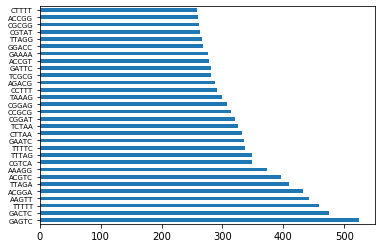

<Figure size 720x720 with 0 Axes>

In [325]:
feat_importances = pd.Series(fit.scores_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.yticks(fontsize=7)
plt.figure(figsize=(10,10))
plt.show()

In [271]:
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA(n_components=6)
fitted = pca.fit_transform(X_std)
df.reset_index(drop=True, inplace=True)
pDf = pd.DataFrame(data = fitted, columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6'])
finalDf = pd.concat([pDf, df[['Type']]], axis = 1)
pca.explained_variance_ratio_

array([0.23818471, 0.18104071, 0.09868948, 0.08931746, 0.04607562,
       0.04014902])

/Users/smithded/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.         0.         0.         ... 0.01879383 0.         0.02583763]


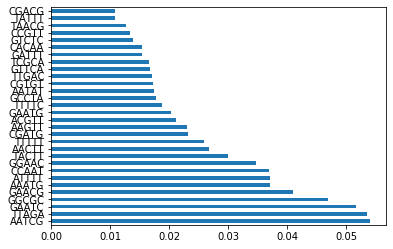

<Figure size 7200x7200 with 0 Axes>

In [322]:
import pandas as pd
import numpy as np

df2=df.iloc[:,2::1]
X=df2
y=df['Type']
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_std,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
fig = plt.figure(figsize = (100,100))
plt.show();

In [272]:
finalDf.head()



,pc1,pc2,pc3,pc4,pc5,pc6,Type
0,10.727654,57.934408,25.926061,-2.079544,-2.841802,2.858323,plasmid
1,-7.857949,17.175870,6.260881,8.360259,8.978142,3.855127,plasmid
2,-9.914676,4.809208,22.358463,49.542439,-4.508377,-20.098325,plasmid
3,-1.116183,16.618402,24.135690,44.780813,-19.878380,61.026657,plasmid
4,2.427672,15.721194,21.056426,11.483454,73.295372,15.196022,plasmid


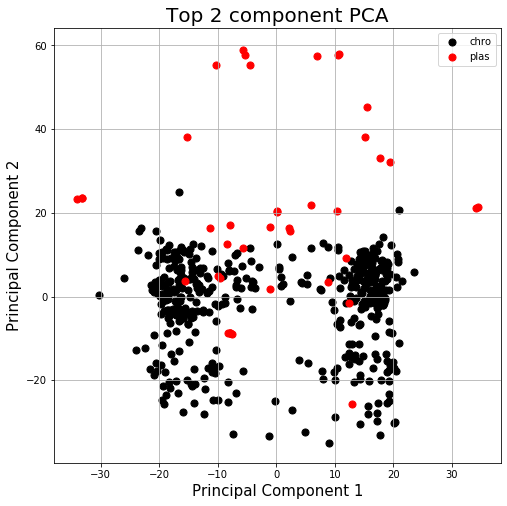

In [273]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Top 2 component PCA', fontsize = 20)
Type = ['chromosome', 'plasmid']
Type2 =['chro', 'plas']
colors = ['black', 'r']
for Type, color in zip(Type,colors):
    indicesToKeep = finalDf['Type'] == Type
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(Type2)

ax.grid()

In [178]:
#SVC training code modified from Clare Liu's 
#SVM Hyperparameter Tuning using GridSearchCV tutorial on www.towardsdatascience.com
kernels = ['Polynomial','RBF', 'Sigmoid','Linear']

def getClassifier(ktype):
    if ktype == 0:
        return SVC(kernel='poly',degree=8, gamma="auto")
    elif ktype == 1:
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        return SVC(kernel='linear', gamma="auto")

In [179]:
for i in range(4):
    X_train, X_test, y_train, y_test= train_test_split(X_std, y, test_size=0.33)
    svclassifier = getClassifier(i)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

  chromosome       0.95      1.00      0.97       157
     plasmid       1.00      0.25      0.40        12

    accuracy                           0.95       169
   macro avg       0.97      0.62      0.69       169
weighted avg       0.95      0.95      0.93       169

Evaluation: RBF kernel
              precision    recall  f1-score   support

  chromosome       0.99      0.99      0.99       157
     plasmid       0.91      0.83      0.87        12

    accuracy                           0.98       169
   macro avg       0.95      0.91      0.93       169
weighted avg       0.98      0.98      0.98       169

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

  chromosome       0.97      1.00      0.98       154
     plasmid       1.00      0.67      0.80        15

    accuracy                           0.97       169
   macro avg       0.98      0.83      0.89     

In [11]:
 X_train, X_test, y_train, y_test= train_test_split(X_std, y, test_size=0.90)

In [309]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001],'kernel':['rbf','poly','linear',
                                                                       'sigmoid']}

In [310]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

/Users/smithded/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ..........

[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .................. C=10, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .................. C=10, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .

[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s


[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:    6.2s finished
/Users/smithded/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [311]:
print(grid.best_estimator_)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [312]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[154   2]
 [  1  12]]
              precision    recall  f1-score   support

  chromosome       0.99      0.99      0.99       156
     plasmid       0.86      0.92      0.89        13

    accuracy                           0.98       169
   macro avg       0.93      0.96      0.94       169
weighted avg       0.98      0.98      0.98       169



In [289]:
modelwholeData = SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [290]:
trainedmodelWD = modelwholeData.fit(X_std,y)

In [291]:
from joblib import dump, load
dump(trainedmodelWD, '500kbmodel.joblib')

['500kbmodel.joblib']

In [187]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelwholeData,X_std,y, cv=10)
scores

array([1.        , 0.98039216, 0.98039216, 1.        , 1.        ,
       0.98039216, 0.96078431, 1.        , 1.        , 1.        ])

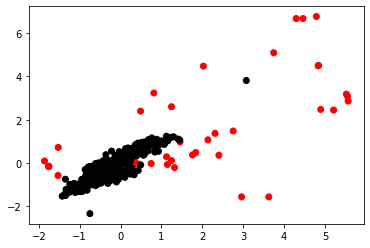

In [313]:
color = ['black' if c == 'chromosome' else 'red' for c in y]
plt.scatter(X_std[:,0],X_std[:,1], c=color)
plt.show();
# Create the hyperplane
w = trainedmodelWD.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (trainedmodelWD.intercept_[0]) / w[1]

# Plot the hyperplane
#plt.plot(xx, yy)


In [314]:
#samples are unbalanced - also modeled subsampling of chromosome so classes are more equal
plasmids = df.loc[df['Type'] == 'plasmid']
chromosomes = df.loc[df['Type'] == 'chromosome']

In [315]:
subchr = chromosomes.sample(frac=0.15, random_state = 42)

In [316]:
subsamp = plasmids
subsamp = subsamp.append(subchr)

In [317]:
subsamp.shape

(111, 1026)

In [207]:
subsamp2=subsamp.iloc[:,2::1]
X=subsamp2
y=subsamp['Type']
X_std = scaler.fit_transform(X)

In [208]:
for i in range(4):
    X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.33)
    svclassifier = getClassifier(i)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

  chromosome       0.87      1.00      0.93        27
     plasmid       1.00      0.60      0.75        10

    accuracy                           0.89        37
   macro avg       0.94      0.80      0.84        37
weighted avg       0.91      0.89      0.88        37

Evaluation: RBF kernel
              precision    recall  f1-score   support

  chromosome       0.92      1.00      0.96        23
     plasmid       1.00      0.86      0.92        14

    accuracy                           0.95        37
   macro avg       0.96      0.93      0.94        37
weighted avg       0.95      0.95      0.94        37

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

  chromosome       0.92      1.00      0.96        22
     plasmid       1.00      0.87      0.93        15

    accuracy                           0.95        37
   macro avg       0.96      0.93      0.94     

In [318]:
 X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.33)


In [319]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

/Users/smithded/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ..........

[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .................. C=10, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .................. C=10, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .

[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s


[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:    6.2s finished
/Users/smithded/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [320]:
print(grid.best_estimator_)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [321]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[152   1]
 [  1  15]]
              precision    recall  f1-score   support

  chromosome       0.99      0.99      0.99       153
     plasmid       0.94      0.94      0.94        16

    accuracy                           0.99       169
   macro avg       0.97      0.97      0.97       169
weighted avg       0.99      0.99      0.99       169



In [215]:
modelreduced =SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [216]:
reducedfit = modelreduced.fit(X_std, y)

In [217]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelreduced,X_std,y, cv=10)
scores

array([1.        , 1.        , 0.90909091, 1.        , 1.        ,
       0.90909091, 0.81818182, 1.        , 1.        , 1.        ])

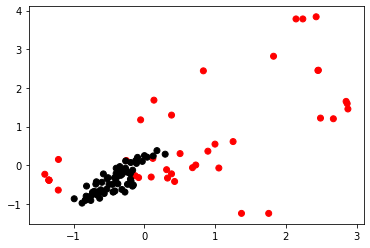

In [218]:
color = ['black' if c == 'chromosome' else 'red' for c in y]
plt.scatter(X_std[:,0],X_std[:,1], c=color)
# Create the hyperplane
#w = reducedfit.coef_[0]
#a = -w[0] / w[1]
#xx = np.linspace(-2.5, 2.5)
#yy = a * xx - (reducedfit.intercept_[0]) / w[1]

# Plot the hyperplane
#plt.plot(xx, yy)
plt.show();
